In [1]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import glob

In [3]:
runaugR = '/Users/Airton/Desktop/runaug/results/weather/test_latest/images/*real_B.png'
runaugF = '/Users/Airton/Desktop/runaug/results/weather/test_latest/images/*fake_B.png'

In [4]:
MSE = [] 
SSIM =[]

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [5]:
run1R = []
for filename in sorted(glob.glob(runsl2R)):
    im=Image.open(filename).convert('L')
    run1R.append(im)

In [6]:
run1F = []
for filename in sorted(glob.glob(runsl2F)):
    im=Image.open(filename).convert('L')
    run1F.append(im)

In [7]:
print(len(run1F))
print(len(run1R))

50
50


In [8]:
MSE = []
SSIM = []
for i in range(len(run1R)):
    m = mse(np.array(run1R[i]),np.array(run1F[i]))
    s = ssim(np.array(run1R[i]),np.array(run1F[i]))
    MSE.append(m)
    SSIM.append(s)

In [9]:
x=list(range(0,50))

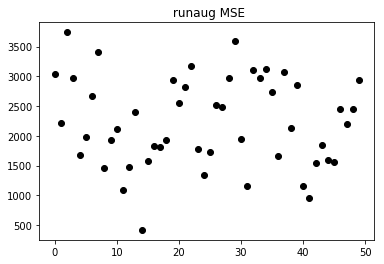

418.8321990966797 3741.164077758789
2222.6345501708984


In [10]:
plt.scatter(x,MSE,c='black')
plt.title(" runaug MSE")
plt.show()
print(min(MSE),max(MSE))
print(np.mean(MSE))

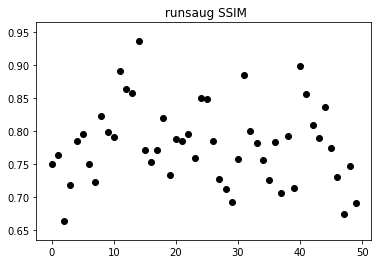

0.6641433884606961 0.93587534824758
0.7801584587772591


In [11]:
plt.scatter(x,SSIM,c='black')
plt.title(" runsaug SSIM")
plt.show()
print(min(SSIM),max(SSIM))
print(np.mean(SSIM))

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
Fthr = []
Fthf = []
for i in range(len(run1R)):
    gray_img= np.array(run1R[i])
    gray_img2= np.array(run1F[i])
    th1 = cv2.threshold(gray_img,1,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(gray_img2,1,255,cv2.THRESH_BINARY)
    Fr = list(th1[1].flatten())
    Ff = list(th2[1].flatten())
    Fthr.append(Fr)
    Fthf.append(Ff)

In [14]:
TN,FP,FN,TP = 0,0,0,0
TN1,FP1,FN1,TP1 = 0,0,0,0

In [15]:
for i in range(len(Fthr)):
    tn,fp,fn,tp=confusion_matrix(Fthr[i], Fthf[i]).ravel()
    TN = TN +tn
    FP = FP +fp
    FN = FN +fn
    TP = TP +tp

In [16]:
Total = TN+FP+FN+TP
TotalP = FN + TP
TotalN = TN + FP
PTN = (TN/Total)*100
PFP = (FP/Total)*100
PFN = (FN/Total)*100
PTP = (TP/Total)*100
To1 = FN + TN
To2 = TP + FP

In [17]:
PTC = []
PTC.append([PTN,PFP,PFN,PTP])

In [18]:
Correct = PTN + PTP
Wrong = PFN + PFP
print("Correct = ", Correct, " Wrong = ", Wrong)

Correct =  89.10189819335938  Wrong =  10.898101806640625


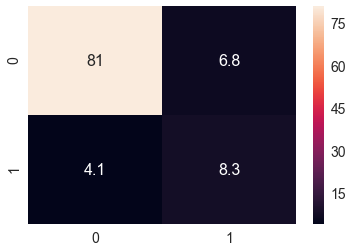

In [19]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFP],
        [PFN,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

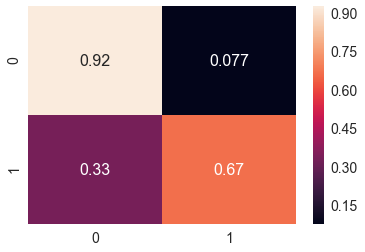

In [20]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/TotalN,FP/TotalN],
        [FN/TotalP,TP/TotalP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size